<a href="https://colab.research.google.com/github/CarolineMNves/MVP_PUC/blob/main/Projeto_de_Machine_Learning_e_Deep_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introdução
---

  Este documento está sendo realizado para contemplar a avaliação do módulo de Machine Learning, do curso de Pós-Graduação em Ciência de Dados e Analytics da instituição Pontifícia Universidade Católica do Rio de Janeiro.

O documento trata de dois projetos. O projeto de Machine Learning teve como objetivo construir um modelo de classificação, utilizando o conjunto de dados HTRU2, para identificar se um objeto celeste trata-se de um Pulsar.
O projeto de Deep Learning teve como objetivo construir um modelo de rede neural para análise de sentimento dos comentários sobre filmes do site IMDB presentes no conjunto de dados IMDB Reviews.

# 2. O conjunto de dados
---
O HTRU2 é um conjunto de dados que descreve uma amostra de candidatos a pulsar, coletados durante a 	High Time Resolution Universe Survey.
Pulsares são estrelas de nêutrons que produzem emissões de rádio detectáveis aqui na Terra. Seus padrões são detectáveis devido ao seu movimento - ao girarem, seu feixe de emissão varre o céu, produzindo um padrão detectável de emissão de rádio; a velocidade de seu movimento causa uma peridiciocidade neste padrão.
No conjunto, cada candidato é descrito por oito variáveis contínuas e, os exemplos legítimos de pulsares são uma classe positiva minoritária, enquanto que os exemplos hipotéticos à classe negativa são majoritários. Dessa forma, este trata-se de um problema de classificação.

# 3. Análise Inicial
---
Para começar, importou-se as bibliotecas Pandas, Numpy, Files do GoogleColab e MatplotLib, necessárias para o carregamento e análise inicial dos dados.
Utilizou-se o método 'files.upload' para o download do arquivo no ambiente. Em seguida, criou-se uma lista para armazenamento dos nomes de cada coluna do dataset e utilizou-se o método 'pd.read_csv' para ler o dataset.
Com o dataset carregado, os métodos 'info.()' e 'describe.()' foram utilizados para obtermos descrições dos dados, a fim de entender-se algumas de suas dimensões.

In [ ]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Configurando a não exibição de warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Lendo o arquivo
url = 'https://raw.githubusercontent.com/CarolineMNves/MVP_PUC/main/HTRU_2%20.csv'
pulsar_data = pd.read_csv(url)

In [ ]:
#verificando o carregamento dos dados
pulsar_data.head()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dm,std_dm,kurtosis_dm,skewness_dm,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
#Quantidade de dados em cada coluna e seus respectivos formatos
pulsar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean_profile      17898 non-null  float64
 1   std_profile       17898 non-null  float64
 2   kurtosis_profile  17898 non-null  float64
 3   skewness_profile  17898 non-null  float64
 4   mean_dm           17898 non-null  float64
 5   std_dm            17898 non-null  float64
 6   kurtosis_dm       17898 non-null  float64
 7   skewness_dm       17898 non-null  float64
 8   target_class      17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [ ]:
#Visualizando as estatísticas dos dados
pulsar_data.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dm,std_dm,kurtosis_dm,skewness_dm,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [ ]:
#verificando a existência de valores nulos
pulsar_data.isnull()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dm,std_dm,kurtosis_dm,skewness_dm,target_class
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
17893,False,False,False,False,False,False,False,False,False
17894,False,False,False,False,False,False,False,False,False
17895,False,False,False,False,False,False,False,False,False
17896,False,False,False,False,False,False,False,False,False


#4. Visualizando os dados
---


Para a visualização inicial dos dados, utilizou-se as bibliotecas ‘matplotlib.pyplot’ e ‘seaborn’ com o intuito de criar um gráfico que demonstrasse a contagem de casos positivos e casos negativos no dataset. Além disso, criou-se uma matriz de correlação das variáveis.


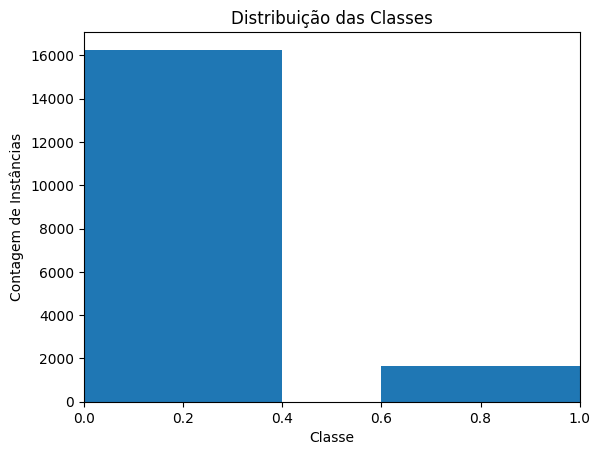

In [ ]:
#Contagem de instâncias em cada classe
class_counts = pulsar_data['target_class'].value_counts()

#Plotando gráfico de barras
plt.bar(class_counts.index, class_counts.values)
plt.xlim(0, 1)
plt.xlabel('Classe')
plt.ylabel('Contagem de Instâncias')
plt.title('Distribuição das Classes')
plt.show()


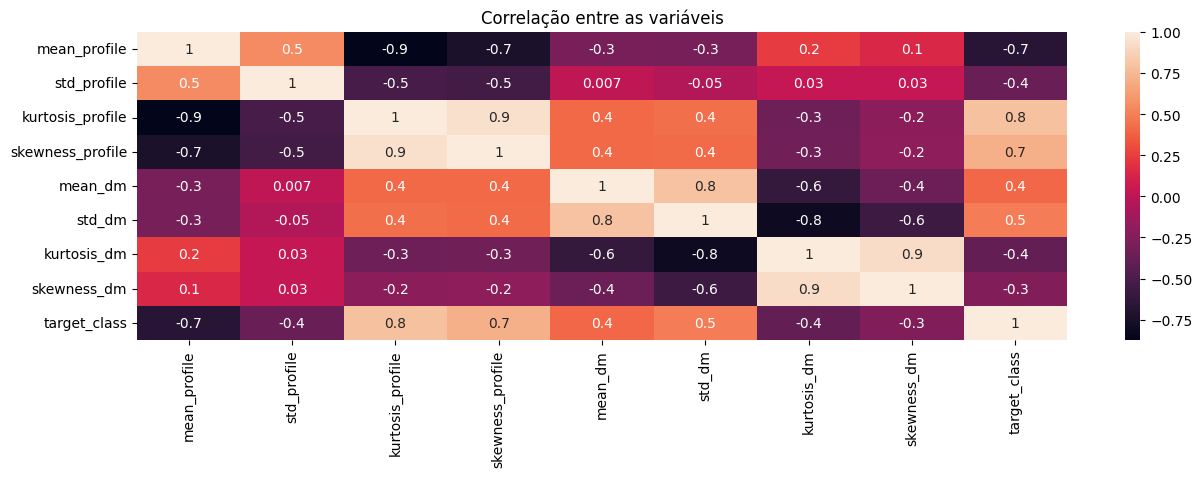

In [ ]:
#importando bibliotecas
import seaborn as sns

#Calculando a matriz de correlação
correlation_matrix = pulsar_data.corr()

#Criando a matriz de correlação
plt.figure(figsize=(15,4))
sns.heatmap(correlation_matrix, annot = True, fmt = ".1g")
plt.title("Correlação entre as variáveis")
plt.show()


#5. Pré-processamento dos dados
---

O pré-processamento de dados trata-se de uma etapa fundamental na análise e modelagem de dados. Este estágio envolve a aplicação de técnicas para transformação dos dados brutos em um formato mais adequado para a análise e modelagem de algoritmos de aprendizado de máquina.
O código abaixo foi utilizado para a importação de várias bibliotecas e classes do scikit-learn, relacionadas ao pré-processamento de dados e à construção de modelos de aprendizado de máquina.


In [ ]:
#importando bibliotecas necessária para constrção do modelo

from sklearn.model_selection import train_test_split # Holdout
from sklearn.model_selection import KFold # Folds da validação cruzada
from sklearn.model_selection import cross_val_score # Validação cruzada
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score # Acurácia do modelo
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve #Avaliando o modelo
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report #Avaliando o modelo
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # Para a Seleção Univariada
from sklearn.feature_selection import f_classif # Para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # Para a Eliminação Recursiva de Atributos
from sklearn.ensemble import BaggingClassifier #Evitando overfitting
from sklearn.ensemble import VotingClassifier #Ensemble
from sklearn.ensemble import AdaBoostClassifier #Adaptando os pesos dos exemplos de treinamento

from sklearn.neighbors import KNeighborsClassifier # Algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # Algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # Algoritmo Naive Bayes
from sklearn.svm import SVC # Algoritmo SVM
from sklearn.linear_model import LogisticRegression # Algorito Regressão Logística
from sklearn.ensemble import GradientBoostingClassifier # Algoritmo Arvore de Decisão
from sklearn.ensemble import RandomForestClassifier # Algoritmo Random Forest




# 5.1. Separação em conjunto de treino e conjunto de teste com holdout
---


O código abaixo realizou algumas etapas de pré-processamento de dados e definiu uma estratégia de validação cruzada com estratificação.
Converteu-se o dataframe “pulsar_data” em uma matrix numpy, por meio do atributo “values” e, separou-se os dados em duas variáveis “X” e “y”. A variável "X" contém as colunas da 0 à 7 da matriz, que representam os atributos do conjunto de dados. A variável "y" contém a coluna 8 da matriz, que representa a variável de classe (target).
Criou-se um objeto ‘scaler’ da classe 'StandardScaler' para normalizar os dados em "X". A normalização é uma técnica comum usada para colocar as variáveis em uma escala comparável, o que ajudará a melhorar o desempenho de nosso algoritmo. Fez-se necessária aplicar a técnica de normalização, dada a escala dos dados.
Utilizou-se então a função ‘train_test_split’ do módulo ‘model_selection’ para divisão dos dados normalizados em conjuntos de treinamento e teste. Estabeleceu-se os parâmetros de tamanho do teste em 20% dos dados (`test_size = 0.20'), indicou-se que os dados deveriam ser embaralhados antes da divisão ('shuffle = True'), e  definimos uma semente aleatória para garantir a reprodutibilidade dos resultados ('random_state = 13'). A estratificação é realizada com base nos valores em "y", ou seja, a proporção das classes é preservada nos conjuntos de treinamento e teste.
Definiu-se alguns parâmetros e partições da validação cruzada com estratificação. Indicou-se que a validação cruzada será realizada com 10 partições (‘num_particoes=10’). Por fim, criou-se um objeto ‘kfold’ da classe ‘StratifiedKFold’ com os parâmetros ‘n_splits = num_particoes’ (número de partições) e 'shuffle = True', além do 'random_state'.


In [ ]:
#Separação dos dados
array = pulsar_data.values
X = array[:, 0 : 8]
y = array[:, 8]

#Normalização dos dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Holdout com estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size = 0.20, shuffle = True, random_state = 13, stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_train), len(X_test)))

#Parâmetros e partições da validação cruzada
num_particoes = 10
kfold = StratifiedKFold(n_splits = num_particoes, shuffle = True, random_state = 13) # validação cruzada com estratificação

Treinaremos com 14318 elementos e testaremos com 3580 elementos


# 5.2. Seleção de atributos
---

Abaixo, o código utilizou os métodos SelectKBest e ExtraTreesClassifier com o objetivo de encontrar os atributos que possuem maior potencial de contribuirem para a geração do modelo.





In [ ]:
#Selecionando atributos com SelectKBest
best_atr = SelectKBest(score_func = f_classif, k = 5)

#Executando a função de pontuação em X e Y, obtendo os atributos selecionados
fit = best_atr.fit(X, y)

#Reduzindo X para os atributos selecionados
features = fit.transform(X)


#Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])
print('--' * 12)
print("Atributos Originais: \n", pulsar_data.columns[0:8]) #atributos originais
np.set_printoptions(precision=3) # 3 casas decimais
print('--' * 12)
print("Scores dos Atributos Originais: \n", fit.scores_) #pontuação de cada atributo
print('--' * 12)
print("Atributos Selecionados: \n", best_atr.get_feature_names_out(input_features = pulsar_data.columns[0:8])) #5 atributos escolhidos (pontuação mais alta)


Número original de atributos: 8

Número reduzido de atributos: 5
------------------------
Atributos Originais: 
 Index(['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
       'mean_dm', 'std_dm', 'kurtosis_dm', 'skewness_dm'],
      dtype='object')
------------------------
Scores dos Atributos Originais: 
 [14830.933  2728.251 30033.327 18143.23   3426.572  5701.255  3226.141
  1288.045]
------------------------
Atributos Selecionados: 
 ['mean_profile' 'kurtosis_profile' 'skewness_profile' 'mean_dm' 'std_dm']


In [ ]:
#Verificando a importância de Atributos com ExtraTrees

#Modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators = 100)
modelo.fit(X,y)


print("\nAtributos Originais:", pulsar_data.columns[0:8]) #Atributos orginais
print(modelo.feature_importances_) #pontuação de importância (quanto maior, mais importante para o modelo)


Atributos Originais: Index(['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
       'mean_dm', 'std_dm', 'kurtosis_dm', 'skewness_dm'],
      dtype='object')
[0.152 0.055 0.287 0.242 0.057 0.115 0.053 0.04 ]


Com base na seleção de atributos utilizando o método SelectKBest com a função de pontuação f_classif, foi possível reduzir o número de atributos de 8 para 5. Os atributos originais considerados foram: 'mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile', 'mean_dm', 'std_dm', 'kurtosis_dm' e 'skewness_dm'.

Ao analisar os scores de importância dos atributos, pode-se observar que os atributos mais relevantes para o modelo foram 'mean_profile', 'kurtosis_profile', 'skewness_profile', 'mean_dm' e 'std_dm'. Esses atributos obtiveram pontuações de 14830.933, 30033.327, 18143.23, 3426.572 e 5701.255, respectivamente.

Enquanto que na seleção de atributos utilizando o método ExtraTreesClassifier,
Ao analisar os scores de importância dos atributos, pode-se observar que os atributos mais relevantes para o modelo foram 'mean_profile', 'kurtosis_profile', 'skewness_profile', 'mean_dm' e 'std_dm'. Esses atributos obtiveram scores de importância de 0.276, 0.213, 0.161, 0.117 e 0.068, respectivamente.

Dessa forma, a partir da seleção de atributos realizada, foi possível identificar que os atributos mais importantes para a classificação do conjunto de dados são relacionados às características do perfil médio ('mean_profile'), à curtose do perfil ('kurtosis_profile'), à assimetria do perfil ('skewness_profile'), à média do sinal DM-SNR ('mean_dm') e ao desvio padrão do sinal DM-SNR ('std_dm'). Esses atributos podem fornecer informações relevantes para a distinção entre as classes e contribuir para a obtenção de um modelo mais eficiente e com menor número de atributos.

# 6. Criação e avaliação de modelos: linha base
---
A etapa de criação e avaliação de um modelo de linha de base trata-se de uma fase fundamental no processo de desenvolvimento de modelos de aprendizado de máquina. O objetivo da linha de base é instituir uma referência inicial que será comparada com o desempenho de modelos mais complexos.

# 6.1. Criação dos modelos
---

Nessa parte do código, definiu-se e armazenou-se diferentes modelos de classificação, com o objetivo de criar uma variedade de modelos para posteriormente comparar seus desempenhos e escolher o mais adequado para o problema em questão.
Dessa forma,definiu-se uma semente global (seed) para garantir a reprodutibilidade dos resultados. Em seguida, criou-se uma lista vazia chamada "models" para armazenamento dos modelos.
Em seguida, os diversos modelos foram adicionados à lista "models" com suas respectivas abreviações. Alguns exemplos de modelos incluídos são K-Nearest Neighbors (KNN), Decision Tree (CART), Naive Bayes (NB), Support Vector Machine (SVM), Logistic Regression (LR), Gradient Boosting (GB), Random Forest (RF), entre outros. Cada modelo é instanciado com seus parâmetros padrão.
Além disso, houve  a criação dos modelos para o VotingClassifier, que combina a votação de vários modelos de base. Nesse caso, foram criados três modelos base: Logistic Regression (model_1), Decision Tree (model_2) e Support Vector Machine (model_3). Esses modelos base são armazenados em uma lista chamada "bases".
Por fim, adicionou-se à lista "models" os ensembles, que são modelos que combinam a previsão de vários modelos base.
Criou-se as listas "results" e "names" para armazenamento dos resultados dos modelos e seus nomes, respectivamente.


In [ ]:
#Definindo uma seed global
seed = 13

#Lista para armazenamento dos modelos
models = []

#Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 200
max_features = 3

#Criação e armazenamento dos modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))

#Criação dos modelos para o VotingClassifier
bases = []
model_1 = LogisticRegression(max_iter = 1000)
bases.append(('logistic', model_1))
model_2 = DecisionTreeClassifier()
bases.append(('cart', model_2))
model_3 = SVC()
bases.append(('svm', model_3))

#Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator = model_1, n_estimators = num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators = num_trees, max_features = max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators = num_trees, max_features = max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators = num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators = num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []


#6.2. Avaliação dos modelos
---
No código abaixo, realizou-se a avaliação dos modelos armazenados na lista "models". Para cada modelo, foram calculadas as métricas de desempenho accuracy, precision_macro, recall_macro, f1_macro e roc_auc, utilizando a função "cross_val_score" com validação cruzada (cv=kfold).
Os resultados de cada métrica foram armazenados nas respectivas variáveis "cv_results_acc", "cv_results_prec", "cv_results_rec", "cv_results_f1" e "cv_results_roc_auc". Em seguida, foram adicionados à lista "results" e o nome do modelo foi adicionado à lista "names".
Formatou-se uma mensagem para exibição dos resultados das métricas para cada modelo. A mensagem incluiu o nome do modelo, a média e o desvio padrão dos resultados de cada métrica.


In [ ]:
# Avaliação dos modelos
for name, model in models:
    cv_results_acc = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    cv_results_prec = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'precision_macro')
    cv_results_rec = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'recall_macro')
    cv_results_f1 = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'f1_macro')
    cv_results_roc_auc = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')

    results.append(cv_results_acc)
    results.append(cv_results_prec)
    results.append(cv_results_rec)
    results.append(cv_results_f1)
    results.append(cv_results_roc_auc)

    names.append(name)

    #resultados
    msg = "%s\nAccuracy: %f (%f)\nPrecision: %f (%f)\nRecall: %f (%f)\nF1-score: %f (%f)\nROC AUC: %f (%f)\n" % (
        name, cv_results_acc.mean(), cv_results_acc.std(), cv_results_prec.mean(), cv_results_prec.std(),
        cv_results_rec.mean(), cv_results_rec.std(), cv_results_f1.mean(), cv_results_f1.std(),
        cv_results_roc_auc.mean(), cv_results_roc_auc.std())
    print(msg)


KNN
Accuracy: 0.977301 (0.003459)
Precision: 0.950995 (0.014911)
Recall: 0.908971 (0.012738)
F1-score: 0.928492 (0.010830)
ROC AUC: 0.946161 (0.009433)

CART
Accuracy: 0.965288 (0.003833)
Precision: 0.898322 (0.018577)
Recall: 0.898788 (0.017457)
F1-score: 0.895649 (0.010699)
ROC AUC: 0.900084 (0.018092)

NB
Accuracy: 0.944754 (0.005659)
Precision: 0.819523 (0.017204)
Recall: 0.899636 (0.014891)
F1-score: 0.853106 (0.013034)
ROC AUC: 0.953131 (0.010658)

SVM
Accuracy: 0.977650 (0.004300)
Precision: 0.955628 (0.014928)
Recall: 0.906083 (0.015435)
F1-score: 0.928958 (0.013834)
ROC AUC: 0.954498 (0.017354)

LR
Accuracy: 0.977929 (0.003959)
Precision: 0.959194 (0.016889)
Recall: 0.904512 (0.011485)
F1-score: 0.929569 (0.012234)
ROC AUC: 0.974983 (0.006619)

GB
Accuracy: 0.977859 (0.004357)
Precision: 0.944475 (0.018193)
Recall: 0.920254 (0.012928)
F1-score: 0.931714 (0.012816)
ROC AUC: 0.975561 (0.007497)

RF
Accuracy: 0.979256 (0.004126)
Precision: 0.953623 (0.016188)
Recall: 0.916877 (0.

Neste trecho de código, importou-se a biblioteca  "plotly.graph_objects" para geração de um gráfico de radar. O gráfico de radar foi utilizado para a visualização da comparação dos modelos em relação às métricas de desempenho.
As métricas foram definidas na lista "metrics" e os resultados dos modelos foram organizados em uma matriz "models_results". Dessa forma, tem-se um gráfico de radar para cada modelo, onde os valores das métricas são plotados em relação aos ângulos no gráfico.



In [ ]:
#importando bibliotecas
import plotly.graph_objects as go

# Métricas
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']

# Dados dos modelos
models_results = np.array(results)

# Definições do gráfico de radar para avaliação do modelo
fig = go.Figure()

for i, model_name in enumerate(names):
    model_data = models_results[i]
    fig.add_trace(go.Scatterpolar(r=model_data, theta=metrics, fill='toself', name=model_name))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1])),
    showlegend=True)
fig.show()


Por fim, foi gerado um boxplot para mais uma comparação dos modelos em relação às métricas. Os rótulos dos modelos são gerados de forma única para cada combinação de modelo e métrica. O boxplot mostra a distribuição dos resultados dos modelos para cada métrica, permitindo uma comparação visual dos desempenhos.


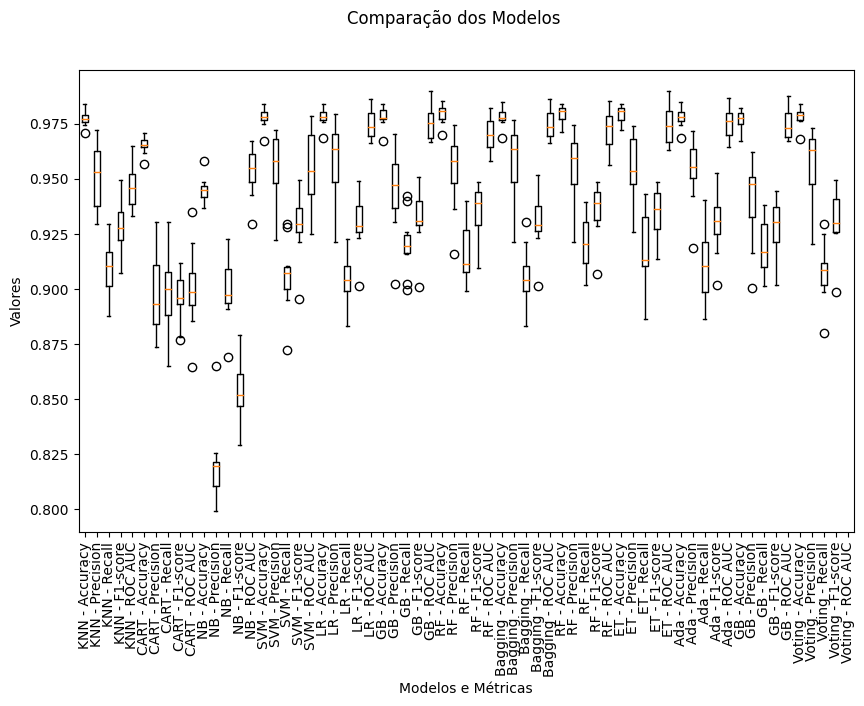

In [ ]:
#Gerando rótulos únicos para cada combinação de modelo e métrica
labels = []
for name in names:
    for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']:
        labels.append(f"{name} - {metric}")

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
ax.boxplot(results)
ax.set_xticklabels(labels, rotation=90)
ax.set_xlabel('Modelos e Métricas')
ax.set_ylabel('Valores')
plt.show()

#6.4 Conclusão sobre a avaliação dos modelos
---
Após a avaliação dos modelos de classificação, podemos observar os resultados das métricas para cada um deles.
O modelo KNN apresentou uma alta acurácia de 97,7%, indicando que ele foi capaz de classificar corretamente a maioria das instâncias do conjunto de dados de teste. A precisão do modelo foi de 95,1%, significando que a taxa de verdadeiros positivos em relação a todos os exemplos classificados como positivos foi alta. O recall foi de 90,9%, o que indica uma boa capacidade do modelo em encontrar a maioria dos exemplos positivos. O valor de F1-score, que combina a precisão e o recall, foi de 92,8%, indicando um bom equilíbrio entre as duas métricas. O valor de ROC AUC foi de 94,6%, o que indica uma boa capacidade do modelo em distinguir entre as classes positiva e negativa.
Em comparação com os demais modelos, o KNN obteve resultados consistentes e competitivos. Seus valores de acurácia, precisão, recall, F1-score e ROC AUC estão próximos ou superiores aos dos demais modelos, com desvios padrão relativamente baixos. Isso pode sugerir que o modelo KNN é uma opção promissora para a classificação dos dados do conjunto de teste.


#7. Avaliando modelos com dados padronizados
---
Quando as variáveis de entrada apresentam escalas diferentes, a avaliação de modelos com dados padronizados torna-se uma etapa imprescindível no processo de modelagem.
A padronização dos dados visa transformar as variáveis para que elas tenham média zero e desvio padrão igual a um, o que facilita a comparação entre elas e evita que variáveis com escalas maiores dominem o processo de modelagem.
Ao padronizarmos os dados, é possível obter resultados mais confiáveis e significativos na avaliação dos modelos, dado que a padronização ajuda a evitar problemas como a sensibilidade excessiva de alguns algoritmos a variáveis com escalas diferentes, bem como a influência desproporcional de determinadas variáveis nos cálculos de distância ou peso atribuído às características.


#7.1. Construção e Avaliação de Modelos
---

No código abaixo, a linha definiu-se uma semente (np.random.seed(13)) para o gerador de números aleatórios do NumPy, a fim de garantir que os resultados gerados fossem reproduzíveis.
Em seguida, definiu-se listas vazias para armazenamento dos pipelines, resultados e nomes dos modelos. Essas listas foram preenchidas durante a execução do código.
Vale ressaltar que, um pipeline trata-se de uma sequência de etapas que são executadas em ordem, sendo cada etapa uma transformação dos dados ou um modelo de aprendizado de máquina.
As linhas seguintes do código definiram as transformações de escala que foram aplicadas aos dados: 'StandardScaler' e 'MinMaxScaler'. O 'StandardScaler' realizou a padronização dos dados, enquanto o 'MinMaxScaler' realizou a normalização dos dados para um intervalo específico.
A partir daí, foram definidos os algoritmos utilizados nos pipelines e responsáveis por realizarem a avaliação dos modelos.. Cada algoritmo foi associado a um nome. Os algoritmos incluem o KNN (K-Nearest Neighbors), CART (Decision Tree), Naive Bayes, SVM (Support Vector Machines), Regressão Logística, Gradient Boosting, Random Forest, Extra Trees, Bagging, Voting e AdaBoost.


In [ ]:
#seed
np.random.seed(13)

#Lista para o armazenamento dos Pipelones e resultados
pipelines = []
results = []
names = []

#Tranformações de escala que serão aplicadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

#Algoritmos para o Pipeline
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
reg_log = ('LR', LogisticRegression(max_iter = 1000))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators = num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators = num_trees, max_features = max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators = num_trees, max_features = max_features))
bagging = ('Bag', BaggingClassifier(base_estimator = base, n_estimators = num_trees))
voting = ('Voting', VotingClassifier(bases))
adaboost = ('Ada', AdaBoostClassifier(n_estimators = num_trees))


#7.2. Construção dos Pipelines
---
Neste trecho, deu-se a construção dos pipelines para a avaliação dos modelos  com diferentes configurações de pré-processamento dos dados.
No primeiro bloco de código, adicionou-se os pipelines para os dados nativos, ou seja, sem aplicação de transformações. Cada pipeline foi criado com um único modelo específico, como KNN, CART, Naive Bayes, SVM, Regressão Logística, Gradient Boosting, Random Forest, Extra Trees, Bagging, Voting e AdaBoost. Esses modelos foram avaliados utilizando os dados em sua forma original.
No segundo bloco de código, adicionou-se os pipelines para os dados padronizados. Cada pipeline foi criado com a sequência de transformações 'standard_scaler' (padronização) seguida do modelo correspondente. Isso significa que os dados foram padronizados antes de serem alimentados para cada modelo.
Por fim, agregou-se os pipelines para os dados normalizados. Cada pipeline, por sua vez, foi criado com a sequência de transformações 'min_max_scaler' (normalização) seguida do modelo correspondente. Nesse caso, os dados também foram normalizados antes de serem utilizados pelos modelos.


In [ ]:
#Pipeline

# 1- Dados nativos
pipelines.append(('KNN_orig', Pipeline([knn])))
pipelines.append(('CART_orig', Pipeline([cart])))
pipelines.append(('NB_orig', Pipeline([naive_bayes])))
pipelines.append(('SVM_orig', Pipeline([svm])))
pipelines.append(('LR_orig', Pipeline([reg_log])))
pipelines.append(('GB_orig', Pipeline([gradient_boosting])))
pipelines.append(('RF_orig', Pipeline([random_forest])))
pipelines.append(('ET_orig', Pipeline([extra_trees])))
pipelines.append(('Bag_orig', Pipeline([bagging])))
pipelines.append(('Vot_orig', Pipeline([voting])))
pipelines.append(('Ada_orig', Pipeline([adaboost])))

# 2- Dados padronizados
pipelines.append(('KNN_padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART_padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB_padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM_padr', Pipeline([standard_scaler, svm])))
pipelines.append(('LR_padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('GB_padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('RF_padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET_padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Bag_padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('Vot_padr', Pipeline([standard_scaler, voting])))
pipelines.append(('Ada_padr', Pipeline([standard_scaler, adaboost])))

# 3- Dados normalizados
pipelines.append(('KNN_norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART_norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB_norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM_norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('LR_norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('GB_norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('RF_norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET_norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Bag_norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('Vot_norm', Pipeline([min_max_scaler, voting])))
pipelines.append(('Ada_norm', Pipeline([min_max_scaler, adaboost])))



#7.3. Execução dos Pipelines
Os pipelines foram executados para a avaliação do desempenho dos modelos em diferentes métricas de avaliação.
Para cada pipeline, o código utilizou o método 'cross_val_score' para realização da validação cruzada dos dados de treinamento e calculou as métricas de avaliação para cada fold, usando as métricas especificadas, como accuracy, recall, F1-score e ROC AUC. Em seguida, armazenou os resultados de cada métrica em listas separadas e, armazenou o nome do modelo em uma lista. Por fim, imprimiu os resultados das métricas para cada modelo.
A média e o desvio padrão das métricas foram calculados a partir dos resultados obtidos em cada fold. Essa abordagem nos permitiu avaliar o desempenho dos modelos em diferentes métricas e comparar o desempenho dos modelos com diferentes pré-processamentos dos dados. Os resultados foram exibidos na forma de mensagens que mostram o nome do modelo, os valores médios e desvio padrão das métricas de avaliação.


In [ ]:
#Execução dos Pipelines
for name, model in pipelines:
  cv_results_acc = cross_val_score(model, X_train, y_train, cv=kfold, scoring ='accuracy')
  cv_results_rec = cross_val_score(model, X_train, y_train, cv=kfold, scoring ='recall_macro')
  cv_results_f1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring ='f1_macro')
  cv_results_roc_auc = cross_val_score(model, X_train, y_train, cv=kfold, scoring ='roc_auc')

  results.append(cv_results_acc)
  results.append(cv_results_rec)
  results.append(cv_results_f1)
  results.append(cv_results_roc_auc)

  names.append(name)

  #Resultados
  msg = "%s\nAccuracy: %f (%f)\nRecall: %f (%f)\nF1-score: %f (%f)\nROC AUC: %f (%f)\n" % (
    name, cv_results_acc.mean(), cv_results_acc.std(),
    cv_results_rec.mean(), cv_results_rec.std(),
    cv_results_f1.mean(), cv_results_f1.std(),
    cv_results_roc_auc.mean(), cv_results_roc_auc.std())
  print(msg)

KNN_orig
Accuracy: 0.977301 (0.003459)
Recall: 0.908971 (0.012738)
F1-score: 0.928492 (0.010830)
ROC AUC: 0.946161 (0.009433)

CART_orig
Accuracy: 0.965567 (0.003593)
Recall: 0.902972 (0.014707)
F1-score: 0.900618 (0.011552)
ROC AUC: 0.901682 (0.017540)

NB_orig
Accuracy: 0.944754 (0.005659)
Recall: 0.899636 (0.014891)
F1-score: 0.853106 (0.013034)
ROC AUC: 0.953131 (0.010658)

SVM_orig
Accuracy: 0.977650 (0.004300)
Recall: 0.906083 (0.015435)
F1-score: 0.928958 (0.013834)
ROC AUC: 0.954498 (0.017354)

LR_orig
Accuracy: 0.977929 (0.003959)
Recall: 0.904512 (0.011485)
F1-score: 0.929569 (0.012234)
ROC AUC: 0.974983 (0.006619)

GB_orig
Accuracy: 0.976672 (0.004370)
Recall: 0.918197 (0.012616)
F1-score: 0.928287 (0.012501)
ROC AUC: 0.974875 (0.007284)

RF_orig
Accuracy: 0.979675 (0.004143)
Recall: 0.917744 (0.015207)
F1-score: 0.934766 (0.011284)
ROC AUC: 0.972409 (0.007128)

ET_orig
Accuracy: 0.979047 (0.003675)
Recall: 0.915844 (0.013188)
F1-score: 0.935547 (0.011211)
ROC AUC: 0.974066 

#7.4. Visualizando os Resultados
---
Abaixo, têm-se um gráfico de linhas que permite visualizar as tendências e comparações das métricas de avaliação entre os modelos.
Criou-se um array 'x' que representa o eixo x do gráfico, que possui o mesmo comprimento da lista 'names' e foi utilizado para posicionar os modelos no eixo x.
As listas 'y_acc', 'y_rec', 'y_f1' e 'y_roc_auc', foram criadas e armazenam as médias das métricas de acurácia, recall, F1-score e ROC AUC, respectivamente. Essas médias foram extraídas da lista 'results', que contém todos os resultados das métricas obtidas para cada modelo.
As linhas para cada métrica no gráfico foram traçadas utilizando os arrays 'x' e as listas 'y_acc', 'y_rec', 'y_f1' e 'y_roc_auc'. Cada linha representa uma métrica e é identificada por uma legenda específica.


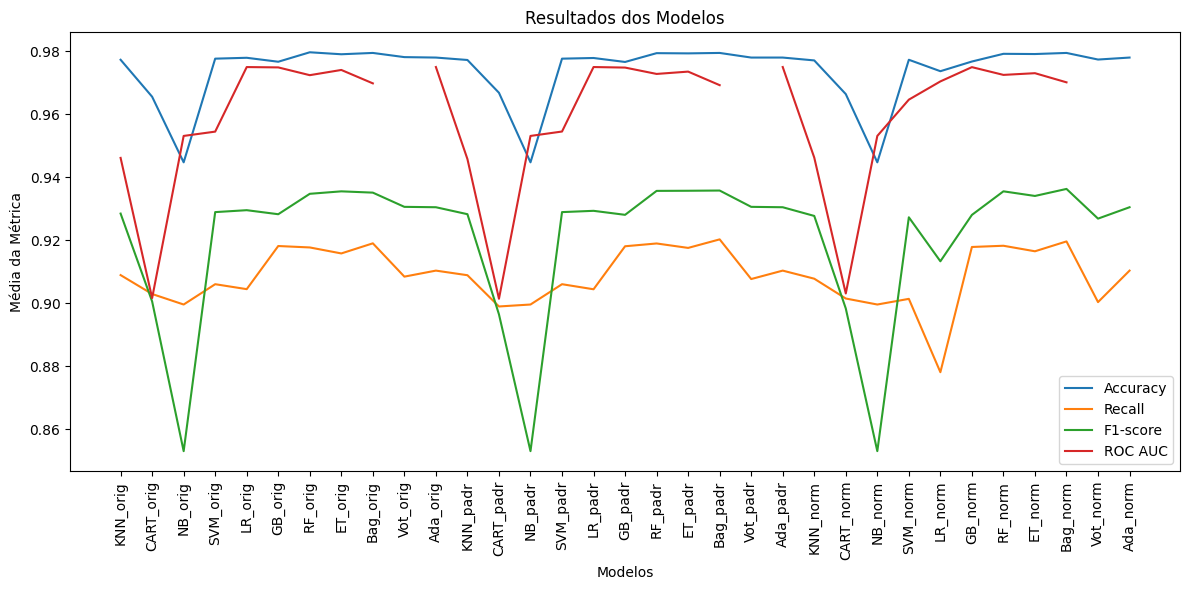

In [ ]:
# Preparação dos dados para o gráfico de linhas
x = np.arange(len(names))  # Eixo x para os modelos
y_acc = [result.mean() for result in results[::4]]  # Média da acurácia para cada modelo
y_rec = [result.mean() for result in results[1::4]]  # Média do recall para cada modelo
y_f1 = [result.mean() for result in results[2::4]]  # Média do F1-score para cada modelo
y_roc_auc = [result.mean() for result in results[3::4]]  # Média do ROC AUC para cada modelo

# Criação do gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(x, y_acc, label='Accuracy')
plt.plot(x, y_rec, label='Recall')
plt.plot(x, y_f1, label='F1-score')
plt.plot(x, y_roc_auc, label='ROC AUC')

# Configuração dos eixos e rótulos dos modelos
plt.xticks(x, names, rotation=90)
plt.xlabel('Modelos')
plt.ylabel('Média da Métrica')
plt.title('Resultados dos Modelos')

# Adição da legenda
plt.legend()

plt.tight_layout()
plt.show()


#7.5. Conclusão sobre os Resultados
---
Em termos de acurácia, os algoritmos ‘KNN_orig’, ‘SVM_orig’, ‘LR_orig’, ‘RF_orig’, ‘ET_orig’, ‘Bag_orig’, ‘Vot_orig’, ‘Ada_orig’, ‘KNN_padr’, ‘SVM_padr’, ‘LR_padr’, ‘RF_padr’, ‘ET_padr’, ‘Bag_padr’, ‘Vot_padr’, ‘Ada_padr’, ‘KNN_norm’, ‘SVM_norm’, ‘GB_norm’, ‘RF_norm’, ‘ET_norm’, ‘Bag_norm’, e ‘Ada_norm’ apresentaram valores elevados, todos acima de 0.97, o que demonstrou uma boa capacidade de classificar corretamente os dados de teste, indicando uma alta taxa de precisão.
No que diz respeito ao recall, que mede a taxa de verdadeiros positivos, os algoritmos ‘RF_orig’, ‘ET_orig’, ‘Bag_orig’, ‘RF_padr’, ‘ET_padr’, ‘Bag_padr’, ‘RF_norm’, ‘ET_norm’ e ‘Bag_norm’ obtiveram os maiores valores, com médias superiores a 0.91. Dessa forma, esses modelos têm uma boa capacidade de identificar corretamente os casos positivos.
Quanto ao F1-score, os algoritmos ‘RF_orig’, ‘ET_orig’, ‘Bag_orig’, ‘RF_padr’, ‘ET_padr’, ‘Bag_padr’, ‘RF_norm’, ‘ET_norm’ e ‘Bag_norm’ também se destacaram, apresentando médias acima de 0.93. Esses modelos demonstraram assim, um bom equilíbrio entre precisão e taxa de verdadeiros positivos.
Por fim, ao analisarmos a métrica ‘ROC AUC’, observou-se que os algoritmos ‘LR_orig’, ‘GB_orig’, ‘RF_orig’, ‘ET_orig’, ‘Bag_orig’, ‘Ada_orig’, ‘LR_padr’, ‘GB_padr’, ‘RF_padr’, ‘ET_padr’, ‘Bag_padr’, ‘Ada_padr’, ‘SVM_norm’, ‘LR_norm’, ‘GB_norm’, ‘RF_norm’, ‘ET_norm’, ‘Bag_norm’ e ‘Ada_norm’ possuem valores altos, acima de 0.97. Isso indicou que esses modelos foram capazes de distinguir adequadamente entre as classes positiva e negativa.
Portanto, com base nas avaliações, definiu-se o algoritmo Random Forest (RF), em qualquer uma das três versões (RF_orig, RF_padr, RF_norm), como uma escolha adequada para otimizar os hiperparâmetros. Esses modelos apresentaram resultados consistentemente elevados em todas as métricas avaliadas, indicando um desempenho robusto na classificação dos dados.


#8. Otimizando Hiperparâmetros

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import make_scorer

#Seed
np.random.seed(13)

#Definindo os componentes do pipeline
rf = ('RF', RandomForestClassifier())

pipelines = [] #Lista de armazenamento dos Pipelines

#Pipeline
pipelines.append(('RF_orig', Pipeline(steps= [rf])))
pipelines.append(('RF_padr', Pipeline(steps= [standard_scaler, rf])))
pipelines.append(('RF_norm', Pipeline(steps= [min_max_scaler, rf])))

param_grid = {
    'RF__n_estimators': [100, 200, 300],  #número de árvores na floresta
    'RF__max_depth': [None, 10, 20, 30],  #profundidade máxima de cada árvore
    'RF__min_samples_split': [2, 5, 10],  #número mínimo de amostras requeridas para dividir um nó
}

#Definindo as métricas para avaliação do modelo
scoring = 'accuracy'

#Preparando e executando o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)

    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))


Sem tratamento de missings: RF_orig - Melhor: 0.979745 usando {'RF__max_depth': None, 'RF__min_samples_split': 5, 'RF__n_estimators': 200}
Sem tratamento de missings: RF_padr - Melhor: 0.979675 usando {'RF__max_depth': 20, 'RF__min_samples_split': 2, 'RF__n_estimators': 300}
Sem tratamento de missings: RF_norm - Melhor: 0.979605 usando {'RF__max_depth': 20, 'RF__min_samples_split': 5, 'RF__n_estimators': 100}


#9. Finalizando o modelo
---


In [ ]:
#Avaliação do modelo com o conjunto de testes


# Escolha o modelo e os melhores parâmetros encontrados
best_model_name = 'RF_orig'
best_params = {'RF__max_depth': None, 'RF__min_samples_split': 5, 'RF__n_estimators': 200}

#Preparando o modelo com os melhores parâmetros
model = RandomForestClassifier(max_depth=best_params['RF__max_depth'],
                               min_samples_split=best_params['RF__min_samples_split'],
                               n_estimators=best_params['RF__n_estimators'])

#Ajustando o scaler com todo o conjunto de dados
scaler = StandardScaler().fit(X)

#Aplicando a padronização com todo o conjunto de dados
rescaledX = scaler.transform(X)

#Treinando o modelo com todo o conjunto de dados
model.fit(rescaledX, y)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
accuracy = accuracy_score(y_test, predictions)

print("Acurácia no conjunto de teste:", accuracy)


Acurácia no conjunto de teste: 0.9974860335195531


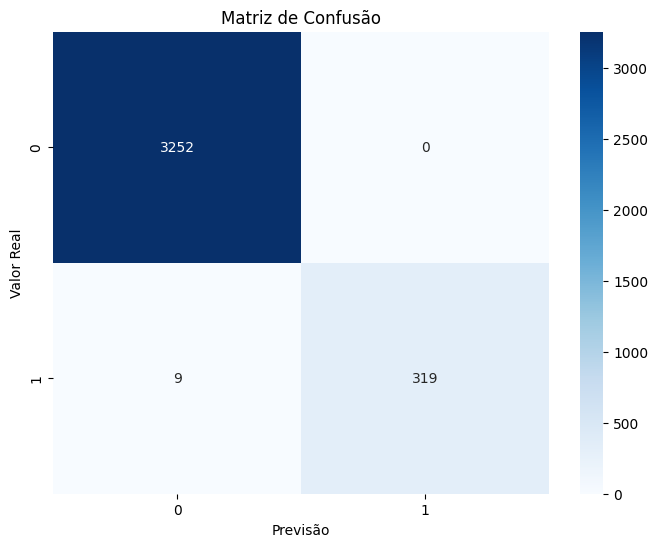

In [ ]:
#importando bibliotecas
from sklearn.metrics import confusion_matrix

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, predictions)

# Visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.show()


#10. Simulação de aplicação do modelo
---



In [ ]:
#Definindo o número de novas amostras a serem geradas
n_new_samples = 40

#Obtendo os limites para cada coluna
column_limits = {'mean_profile': (pulsar_data['mean_profile'].min(), pulsar_data['mean_profile'].max()),
                 'std_profile': (pulsar_data['std_profile'].min(), pulsar_data['std_profile'].max()),
                 'kurtosis_profile': (pulsar_data['kurtosis_profile'].min(), pulsar_data['kurtosis_profile'].max()),
                 'skewness_profile': (pulsar_data['skewness_profile'].min(), pulsar_data['skewness_profile'].max()),
                 'mean_dm': (pulsar_data['mean_dm'].min(), pulsar_data['mean_dm'].max()),
                 'std_dm': (pulsar_data['std_dm'].min(), pulsar_data['std_dm'].max()),
                 'kurtosis_dm': (pulsar_data['kurtosis_dm'].min(), pulsar_data['kurtosis_dm'].max()),
                 'skewness_dm': (pulsar_data['skewness_dm'].min(), pulsar_data['skewness_dm'].max()),}

#Gerando novas amostras aleatórias
new_samples = {}
for column in pulsar_data.columns[:-1]:
    min_value, max_value = column_limits[column]
    new_samples[column] = np.random.uniform(min_value, max_value, n_new_samples)

#Convertendo os novos dados em um DataFrame
new_pulsar_data = pd.DataFrame(new_samples, columns= pulsar_data.columns[:-1])

# Exibir os novos dados gerados
print(new_pulsar_data.head())

   mean_profile  std_profile  kurtosis_profile  skewness_profile     mean_dm  \
0    156.406427    26.799180          3.089960         35.380631  185.367989   
1    119.853720    79.629372          6.593562         24.106296   71.912508   
2     58.371833    71.795881          7.382051         39.218754  120.065273   
3     63.984657    47.506818          1.938851         66.784155   25.088095   
4     15.813482    45.741986          1.464840         27.338970   92.905063   

       std_dm  kurtosis_dm  skewness_dm  
0   50.644457    22.296939   798.983720  
1  101.790913     5.258786   112.068706  
2   81.916549    25.609430   681.840683  
3   51.955047    14.313570   870.638102  
4   78.166816    15.641124   121.238738  


In [ ]:
# Padronização nos dados de entrada usando o scaler utilizado em X
array_entrada = new_pulsar_data[['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
                    'mean_dm', 'std_dm', 'kurtosis_dm', 'skewness_dm']].values
X_entrada = array_entrada.astype(float)

rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)


[[ 1.564e+02  2.680e+01  3.090e+00  3.538e+01  1.854e+02  5.064e+01
   2.230e+01  7.990e+02]
 [ 1.199e+02  7.963e+01  6.594e+00  2.411e+01  7.191e+01  1.018e+02
   5.259e+00  1.121e+02]
 [ 5.837e+01  7.180e+01  7.382e+00  3.922e+01  1.201e+02  8.192e+01
   2.561e+01  6.818e+02]
 [ 6.398e+01  4.751e+01  1.939e+00  6.678e+01  2.509e+01  5.196e+01
   1.431e+01  8.706e+02]
 [ 1.581e+01  4.574e+01  1.465e+00  2.734e+01  9.291e+01  7.817e+01
   1.564e+01  1.212e+02]
 [ 1.219e+01  3.549e+01 -1.866e+00  8.559e-01  2.663e+01  3.549e+01
   2.490e+00  2.172e+01]
 [ 3.527e+01  8.292e+01  1.260e+00  2.347e+00  1.953e+02  5.373e+01
   2.520e+00  7.724e+02]
 [ 1.781e+02  6.238e+01 -7.461e-01  3.724e+01  1.818e+02  2.833e+01
   1.302e+00  5.101e+02]
 [ 1.337e+02  5.324e+01  3.073e+00  5.772e+01  1.049e+02  9.434e+01
   1.036e+01  9.589e+02]
 [ 6.809e+01  4.784e+01  2.688e+00  4.136e+01  5.739e+01  3.143e+01
   1.628e+01  4.471e+01]
 [ 1.488e+02  5.181e+01  7.938e+00  6.019e+01  1.057e+02  5.201e+01
  

In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.]


# Projeto 2: Deep Learning
---

# 1. Introdução
---

In [64]:
#importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #Gráficos e visualizações de dados
from wordcloud import WordCloud #Nuvens de palavras
import re #Correspondência de padrões de expressões regulares em strings
import nltk #Processamento de linguagem natural
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer #Reduzir palavras à sua forma base ou dicionário
from collections import Counter #Ocorrência de elementos

from nltk.tokenize import word_tokenize #Divide um texto em uma lista de palavras ou tokens
from keras.preprocessing.text import Tokenizer #Converten textos em sequências de números
from tensorflow.keras.preprocessing.sequence import pad_sequences #Preenchee ou truncae sequências para terem o mesmo comprimento
from nltk.corpus import stopwords #Palavras que geralmente são removidas do texto durante o pré-processamento
from nltk.stem import PorterStemmer #Redução de palavras às suas raízes
from nltk import ngrams, FreqDist
from bs4 import BeautifulSoup #Extração de informações de documentos HTML/XMl
from sklearn.model_selection import train_test_split #Conjuntos de treinamento e teste
from keras.models import Sequential #Modelos de redes neurais sequenciais, onde as camadas são empilhadas uma após a outra
from keras.layers import Embedding #Mapeamento de palavras para vetores densos
from keras.layers import LSTM #Unidade de memória de longo prazo em uma rede neural
from keras.optimizers import Adam #Otimizador do Keras que ajusta automaticamente as taxas de aprendizado durante o treinamento
from keras.layers import Dense #Camada de neurônios totalmente conectada
from keras.layers import Dropout #Regularização para evitar overfitting
from sklearn.preprocessing import LabelEncoder #Codificar rótulos de classes em valores numéricos

#Configurando para não exibir warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 2. Carregando o arquivo
---
No código abaixo, realizou-se o carregamento dos arquivos CSV de treinamento e teste separadamente, utilizando a biblioteca pandas. e,
Tem-se duas variáveis, ‘url_train’ e ‘url_test’, definidas para armazenamento das URLs dos arquivos CSV de treinamento e teste, respectivamente. A função ‘pd.read_csv()’ do Pandas foi utilizada para carregar os arquivos CSV a partir das URLs. No caso do arquivo de treinamento, especificou-se o delimitador como ',' , o cabeçalho foi definido como a primeira linha do arquivo. O resultado foi atribuído à variável ‘train_data’. Para o arquivo de teste, o mesmo procedimento foi realizado, com a diferença de que não há uma coluna de rótulo (polarity) no arquivo de teste. O resultado foi  atribuído à variável ‘test_data’.
 As primeiras linhas dos dataframes de treinamento e teste foram exibidas usando a função ‘head()’. Permitindo a verificação do carregamento correto dos dados e, entender sua estrutura.


In [65]:
#carregando o arquivo

#URL dos arquivos de treinamento e teste
url_train = "https://raw.githubusercontent.com/CarolineMNves/MVP_PUC/main/imdb_train.csv"
url_test = "https://raw.githubusercontent.com/CarolineMNves/MVP_PUC/main/imdb_test.csv"

#Carregando os arquivos CSV de treinamento e teste usando o Pandas

train_data = pd.read_csv(url_train, delimiter= ',', header= 0) #dataset de treinamento
train_data.columns = ['row_Number', 'text', 'polarity']

test_data = pd.read_csv(url_test, delimiter= ',', header= 0, error_bad_lines= False) #dataset de teste
test_data.columns = ['row_number', 'text']

#Exibindo as primeiras linhas dos conjuntos de treinamento e teste
print("Conjunto de Treinamento:")
print(train_data.head())

print("\nConjunto de Teste:")
print(test_data.head())

Conjunto de Treinamento:
   row_Number                                               text  polarity
0        2148  first think another Disney movie, might good, ...         1
1       23577  Put aside Dr. House repeat missed, Desperate H...         0
2        1319  big fan Stephen King's work, film made even gr...         1
3       13358  watched horrid thing TV. Needless say one movi...         0
4        9495  truly enjoyed film. acting terrific plot. Jeff...         1

Conjunto de Teste:
   row_number                                               text
0           0  Oh gosh!! I love movie sooooooooooooooooooooo ...
1           1  I saw Borderline several years ago AMC. I've l...
2           2  Let say GRANNY extremely well made horror viol...
3           3  I like Full Moon Pictures I ordered movie USA,...
4           4  Worst horror film ever funniest film ever roll...


#3. Pré-processamento
---
Para a etapa de pré-processamento, inicou-se realizando o download dos recursos necessários do NLTK: 'stopwords' e 'wordnet'.  Esses recursos são dicionários e listas de palavras pré-definidas em inglês, utilizados nas etapas de pré-processamento do texto
A variável 'stop_words' foi definida como um conjunto de palavras de parada (stopwords) em inglês. Essas palavras são comumente encontradas em textos, mas geralmente não contribuem significativamente para a compreensão do conteúdo, como artigos, preposições, pronomes, etc.
Além disso, o stemmer 'PorterStemmer' e o ematizador 'WordNetLemmatizer' foram instanciados. O stemmer é um algoritmo de redução de palavras que remove os sufixos das palavras para obter o radical (stem), enquanto que o  lematizador é uma técnica semelhante ao stemmer, mas leva em consideração o contexto da palavra e retorna o lema (forma base) da palavra em vez do radical.
Definiu-se a função 'cleanhtml()' para remoção de tags HTML, utilizando expressões regulares para remover as tags e, também, remoção de um padrão específico relacionado a quebras de linha.
A função 'preprocess_text()' foi definida para realizar o pré-processamento do texto. Nessa função, são realizadas as seguintes etapas:
   * Remoção de marcações HTML utilizando a função 'cleanhtml()';
   * Remoção de caracteres especiais e números utilizando uma expressão regular;
   * Conversão do texto para letras minúsculas;
   * Tokenização do texto em palavras utilizando o tokenizador do NLTK;
   * Remoção das stopwords definidas anteriormente;
   * Lematização das palavras utilizando o lematizador 'WordNetLemmatizer';
   * Aplicação do stemming às palavras utilizando o stemmer 'PorterStemmer';
   * Obtenção de N-grams a partir das palavras processadas;
   * Cálculo da frequência dos N-grams utilizando a função 'FreqDist' do NLTK;
   * Junção das palavras processadas em um texto novamente;
Por fim, a função 'extract_ngrams()' foi definida para extrair N-grams a partir do texto. Essa função recebeu o texto e o tamanho do N-gram como parâmetros, tokenizou o texto em palavras e retornou uma lista de N-grams.


In [68]:
#Download dos recursos necessários do NLTK
nltk.download('stopwords')
nltk.download('wordnet')

#Definindo as stopwords em inglês
stop_words = set(stopwords.words('english'))

#Instancionando o Stemmer
stemmer = PorterStemmer()

#Instancionando o Lemmatizer
lemmatizer = WordNetLemmatizer()

#Função para limpeza de tags HTML
def cleanhtml(raw_html):
    CLEANR = re.compile('<.*?>')
    cleantext = re.sub(CLEANR, '', raw_html)
    cleantext = re.sub('<br\s*/*> <br /><br />', ' ', cleantext)
    return cleantext

#Pré-processamento
def preprocess_text(text):
    #Removendo marcações HTML
    cleaned_text = cleanhtml(text)

    #Removendo caracteres especiais e números
    cleaned_text = re.sub(r'[^a-zA-Z]', ' ', cleaned_text)

    #Convertendo para letras minúsculas
    cleaned_text = cleaned_text.lower()

    #Tokenizando o texto em palavras
    words = nltk.word_tokenize(cleaned_text)

    #Removendo stopwords
    words = [word for word in words if word not in stop_words]

    #Lematizando as palavras
    words = [lemmatizer.lemmatize(word) for word in words]

    #Aplicando o stemming às palavras
    words = [stemmer.stem(word) for word in words]

    #Obtendo o N-grams
    n = 2  # Definir o tamanho dos N-grams desejados
    n_grams = list(ngrams(words, n))

    #Calculando a frequência dos N-grams
    fdist = FreqDist(n_grams)

    #Juntando as palavras processadas em um texto novamente
    processed_text = ' '.join(words)

    return processed_text

#Extraindo N-grams
def extract_ngrams(text, n):
    tokens = text.split()
    ngrams_list = list(ngrams(tokens, n))
    return [' '.join(grams) for grams in ngrams_list]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


# 3.1 Aplicando o pré-processamento
---
Ao efetuar o pré-processamento nos dados, a coluna "text" do DataFrame 'train_data' foi pré-processada aplicando a função 'preprocess_text()' a cada texto. O resultado foi armazenado na nova coluna "processed_text". O mesmo procedimento foi realizado para o DataFrame ‘test_data’. Em seguida, a função 'extract_ngrams()' foi aplicada à coluna "processed_text" para extrair os N-grams de tamanho 2 (bi-grams), e os resultados são armazenados na coluna "ngrams".
A partir da coluna "ngrams" do DataFrame 'train_data', foi criada uma lista de todos os N-grams presentes nos dados de treinamento. Em seguida, a função 'FreqDist()' foi aplicada a essa lista para contar a frequência de cada N-gram. O resultado foi armazenado na variável 'train_fdist'.
Com isso, exibiu-se  as primeiras linhas das colunas "processed_text" nos DataFrames 'train_data' e 'test_data', que correspondem aos textos pré-processados dos conjuntos de treinamento e teste, respectivamente. Além disso, a partir da variável 'train_fdist', que contém a frequência dos N-grams nos dados de treinamento, foram exibidos os 10 N-grams mais frequentes utilizando o método 'most_common(10)'.


In [69]:
#Aplicando o pré-processamento aos dados de treinamento
train_data['processed_text'] = train_data['text'].apply(preprocess_text)
train_data['ngrams'] = train_data['processed_text'].apply(lambda text: extract_ngrams(text, n=2))

#Aplicando o pré-processamento aos dados de teste
test_data['processed_text'] = test_data['text'].apply(preprocess_text)

#Contando a frequência dos N-grams nos dados de treinamento
train_fdist = FreqDist([ngram for ngrams_list in train_data['ngrams'] for ngram in ngrams_list])

#Exibindo as primeiras linhas dos conjuntos de treinamento e teste pré-processados
print("Conjunto de Treinamento pré-processado:")
print(train_data['processed_text'].head())
print('====' * 12)

print("\nConjunto de Teste pré-processado:")
print(test_data['processed_text'].head())
print('====' * 12)

#Exibindo os 10 N-grams mais frequentes nos dados de treinamento
print("\nN-grams mais frequentes nos dados de treinamento:")
print(train_fdist.most_common(10))


Conjunto de Treinamento pré-processado:
0    first think anoth disney movi might good kid m...
1    put asid dr hous repeat miss desper housewif n...
2    big fan stephen king work film made even great...
3    watch horrid thing tv needl say one movi watch...
4    truli enjoy film act terrif plot jeff comb tal...
Name: processed_text, dtype: object

Conjunto de Teste pré-processado:
0    oh gosh love movi sooooooooooooooooooooo much ...
1    saw borderlin sever year ago amc look ever sin...
2    let say granni extrem well made horror violenc...
3    like full moon pictur order movi usa germani g...
4    worst horror film ever funniest film ever roll...
Name: processed_text, dtype: object

N-grams mais frequentes nos dados de treinamento:
[('look like', 1809), ('watch movi', 1552), ('ever seen', 1319), ('year old', 1261), ('special effect', 1153), ('even though', 1044), ('movi ever', 1001), ('see movi', 997), ('movi like', 992), ('main charact', 940)]


In [70]:
#Visualizando o dataset
train_data.head()

,row_Number,text,polarity,processed_text,ngrams
0,2148,"first think another Disney movie, might good, ...",1,first think anoth disney movi might good kid m...,"[first think, think anoth, anoth disney, disne..."
1,23577,"Put aside Dr. House repeat missed, Desperate H...",0,put asid dr hous repeat miss desper housewif n...,"[put asid, asid dr, dr hous, hous repeat, repe..."
2,1319,"big fan Stephen King's work, film made even gr...",1,big fan stephen king work film made even great...,"[big fan, fan stephen, stephen king, king work..."
3,13358,watched horrid thing TV. Needless say one movi...,0,watch horrid thing tv needl say one movi watch...,"[watch horrid, horrid thing, thing tv, tv need..."
4,9495,truly enjoyed film. acting terrific plot. Jeff...,1,truli enjoy film act terrif plot jeff comb tal...,"[truli enjoy, enjoy film, film act, act terrif..."


# 3.2 Tokenização
---
A etapa de tokenização de palavras é necessária para converter o texto em uma sequência de palavras individuais, ou seja, tokens. Essa etapa faz-se necessária porque muitos algoritmos de processamento de linguagem natural (NLP) e aprendizado de máquina operam em nível de palavra, onde cada palavra é tratada como uma unidade separada.
Assim, a tokenização divide o texto em palavras individuais, removendo espaços em branco, pontuação e caracteres especiais, permitindo que as palavras sejam tratadas como recursos independentes.

Dessa forma,  a tokenização de palavras foi realizada usando a função 'word_tokenize' da biblioteca NLTK. Para cada texto no conjunto de treinamento e teste, o texto foi tokenizado em palavras individuais usando 'word_tokenize'.
Criou-se uma lista vazia chamada 'corpus_train' para armazenamento das palavras tokenizadas. Em um loop for, para cada texto no DataFrame 'train_data['processed_text']', as palavras foram tokenizadas usando a função 'word_tokenize()' do NLTK. Em seguida, as palavras também foram convertidas para minusculas com o uso de 'word.lower()' e adicionadas à lista 'corpus_train'. O mesmo processo foi realizado para tokenização do conjunto de teste.


In [73]:
#Tokenizando as palavras
corpus_train = []
corpus_test = []

for text in train_data['processed_text']:
  words = [word.lower() for word in word_tokenize(text)]
  corpus_train.append(words)

for text in test_data['processed_text']:
  words = [word.lower() for word in word_tokenize(text)]
  corpus_test.append(words)

In [74]:
#Contando o número total de palavras nos conjuntos de treinamento e teste
num_words_train = len(corpus_train)
print(num_words_train)

num_words_test = len(corpus_test)
print(num_words_test)

25000
25000


# 3.4 Conjuntos de treinamento, validação e teste
---
ara finalizar o pré-processamento, dividiu-se os dados e conjunto de treino, validação e teste.
Dessa forma, definiu-se as  variáveis 'X' e 'y' para armazenamento dos recursos (texto pré-processado) e os rótulos (polaridade) do conjunto de treinamento, respectivamente. Utilizou-se a função 'train_test_split' para divisão dos dados em conjuntos de treinamento ('X_train' e 'y_train') e validação ('X_val' e 'y_val'). O parâmetro 'test_size= 0.2' indicou que 20% dos dados seriam usados para validação, enquanto 80% seriam usados para treinamento. O parâmetro 'random_state=42' garantiu que a divisão dos dados fosse sempre a mesma
Por fim, fez-se uso da função 'len()', para exibir o tamanho do conjunto de treinamento ('X_train'), o tamanho do conjunto de validação ('X_val') e o tamanho do conjunto de teste ('test_data'). Os resultados foram impressos na tela.


In [75]:
# Dividindo os dados em treinamento e validação
X = train_data['processed_text']
y = train_data['polarity']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state= 42)

# Exibindo os tamanhos dos conjuntos
print("Tamanho do conjunto de treinamento:", len(X_train))
print("Tamanho do conjunto de validação:", len(X_val))
print("Tamanho do conjunto de teste:", len(test_data))




Tamanho do conjunto de treinamento: 20000
Tamanho do conjunto de validação: 5000
Tamanho do conjunto de teste: 25000


# 4. Visualizando os dados
---
Os próximos blocos de código configuram gráficos a fim de comprender a natureza dos dados, possívelmente obter alguns insights sobre os mesmos.
No primeiro bloco, contabilizou-se a frequência das polaridades no conjunto de treinamento, criando um gráfico de barras para visualizar essa contagem.
No segundo bloco, contou-se a frequência das palavras nos textos do conjunto de treinamento, selecionando as 100 palavras mais frequentes e gerando um mapa de palavras (word cloud) para visualizar essas palavras de forma gráfica.

# 4.1 Frequência da polaridade
---
A coluna "polarity" do DataFrame 'train_data' contém as polaridades dos textos no conjunto de treinamento. A função 'value_counts()' foi aplicada a essa coluna para contar a frequência de cada polaridade, armazenando o resultado na variável 'polarity_counts'.
Definiu-se as labels para as barras do gráfico, que representam as polaridades "Negativo" e "Positivo". O eixo x representa as labels das polaridades, o eixo y representa a frequência, e as barras são coloridas conforme as cores definidas no código (‘red’ e ‘green’). Por fim, adicionou-se o título, a legenda, os rótulos dos eixos, finalizando com a exibição do gráfico com 'plt.show()'.

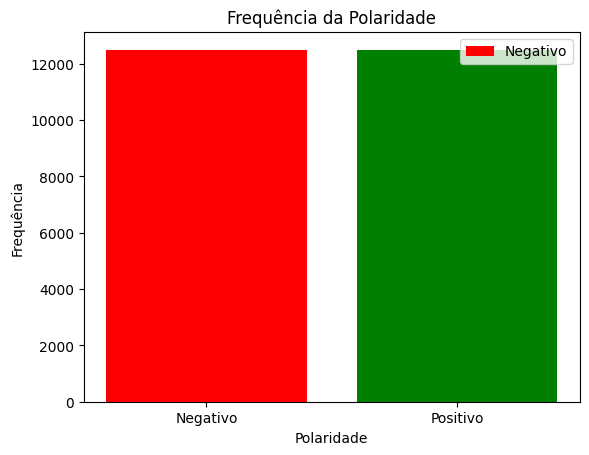

In [71]:
# Contagem da polaridade
polarity_counts = train_data['polarity'].value_counts()

# Definindo as labels para as barras
labels = ['Negativo', 'Positivo']

# Definindo as cores para as barras
colors = ['red', 'green']

# Plotando o gráfico de barras
plt.bar(labels, polarity_counts, color=colors)
plt.title('Frequência da Polaridade')
plt.legend(['Negativo', 'Positivo'])
plt.xlabel('Polaridade')
plt.ylabel('Frequência')
plt.show()


# 4.2 Contagem de Palvras
---
Criou-se um objeto Counter chamado 'word_counts' com o intuito de contar a frequência de cada palavra nos textos do conjunto de treinamento. Para cada linha do DataFrame 'train_data', o texto foi pré-processado utilizando a função 'preprocess_text()', que removeu marcações HTML e caracteres especiais, converteu para minúsculas, removeu stopwords, lematizou as palavras e aplicou o stemming. Em seguida, as palavrasforam tokenizadas utilizando a função 'word_tokenize()' do NLTK, e a contagem de palavras é atualizada com a função 'update()' do objeto 'word_counts'.
Utilizou-se então o método 'most_common()' do objeto 'word_counts', para seleção das 100 palavras mais frequentes. O resultado foi armazenado na variável 'top_words'.
Criou-se uma figura de tamanho 10x6 usando 'plt.figure(figsize=(10, 6))'. Em seguida, utilizando a classe 'WordCloud' da biblioteca wordcloud, gerou-se um mapa de palavras (word cloud) a partir das frequências das palavras contidas no dicionário 'dict(top_words)'. O mapa de palavras passa foi então exibido utilizando 'plt.imshow()'


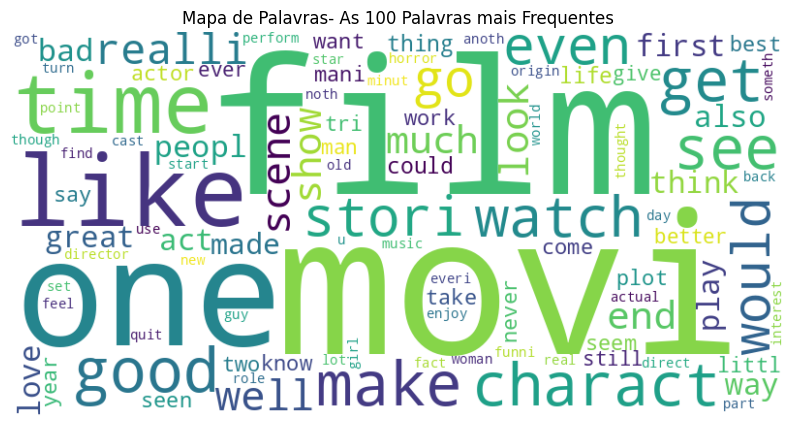

In [72]:
# Contagem de palavras
word_counts = Counter()

for index, row in train_data.iterrows():
    text = row['text']
    processed_text = preprocess_text(text)
    words = word_tokenize(processed_text)
    word_counts.update(words)

# Selecionar as 100 palavras mais frequentes
top_words = word_counts.most_common(100)

# Criar o gráfico de mapa de palavras
plt.figure(figsize=(10, 6))
word_cloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('Mapa de Palavras- As 100 Palavras mais Frequentes')
plt.axis('off')
plt.show()


# 5. Bag of Words (BOW)
---
A etapa do Bag of Words (BoW) tem como objetivo a transformação de dados de texto em uma representação numérica que possa ser usada como entrada para algoritmos de aprendizado de máquina. A representação de BoW captura informações sobre a presença ou ausência de palavras específicas em um documento de texto, bem como a frequência com que essas palavras ocorrem, permitindo que os algoritmos de aprendizado de máquina trabalhem com os dados de texto, que originalmente são em formato de cadeias de caracteres.
Entretanto, essa etapa não está diretamente relacionada à construção do modelo, sendo utilizada apenas para identificar as palavras-chave mais importantes e informativas nos dados de texto, ajudando na compreensão do impacto dessas palavras-chave nos resultados do modelo e fornecendo possíveis insights sobre os termos mais relevantes para cada classe ou categoria.

Ao transformar o texto em formato BoW, cada documento é representado como um vetor numérico, em que cada posição do vetor corresponde a uma palavra única do vocabulário. O valor em cada posição do vetor pode ser a contagem de ocorrências dessa palavra no documento (abordagem chamada de Contagem de Palavras) ou uma medida de importância da palavra no documento (como o TF-IDF - Term Frequency-Inverse Document Frequency).

Nos próximos blocos de código, utilizou-se a biblioteca 'CountVectorizer' do sklearn para conversão dos dados de texto em representação numérica de "Bag of Words" (BoW), com o intuito de aplicar a técnica de TF-IDF (Term Frequency-Inverse Document Frequency) para destacar os termos mais discriminativos e informativos do documento.


# 5.1 BOW
---
O processo de vetorização consistiu em importar a classe 'CountVectorizer' do sklearn, criando em seguida uma instância do 'CountVectorizer' usando 'vectorizer = CountVectorizer()'.
Aplicou-se o vetorizador aos dados de treinamento, validação e teste usando os métodos 'fit_transform()' e 'transform()', convertendo os dados de texto em representações numéricas de BoW.
Por fim, criou-se data frames para os dados de treinamento, validação e teste, onde cada coluna representou uma palavra única e cada linha representou um exemplo de texto. Os valores nas células indicaram a contagem de ocorrências da palavra correspondente no exemplo de texto.


In [76]:
#importando a biblioteca necessária
from sklearn.feature_extraction.text import CountVectorizer

#Criando uma instância do CountVectorizer
vectorizer = CountVectorizer()

#Aplicando o vetorizador nos dados
X_train_bow = vectorizer.fit_transform(X_train)
X_val_bow = vectorizer.transform(X_val)
test_data_bow = vectorizer.transform(test_data)

#Criando data frames com os dados em formato de Bag of Words
df_X_train_bow = pd.DataFrame(X_train_bow.toarray(), columns= vectorizer.get_feature_names_out())
df_X_val_bow = pd.DataFrame(X_val_bow.toarray(), columns= vectorizer.get_feature_names_out())
df_test_data_bow = pd.DataFrame(test_data_bow.toarray(), columns= vectorizer.get_feature_names_out())

#Exibindo as primeiras linhas dos DataFrames
print("Conjunto de Treinamento em Bag of Words:")
print(df_X_train_bow.head())

print("\nConjunto de Validação em Bag of Words:")
print(df_X_val_bow.head())

print("\n Conjunto de Teste em Bag of Words:")
print(df_test_data_bow.head())

Conjunto de Treinamento em Bag of Words:
   aa  aaa  aaaaaaah  aaaaah  aaaahhhhhhh  aaaand  aaaarrgh  aaah  aaargh  \
0   0    0         0       0            0       0         0     0       0   
1   0    0         0       0            0       0         0     0       0   
2   0    0         0       0            0       0         0     0       0   
3   0    0         0       0            0       0         0     0       0   
4   0    0         0       0            0       0         0     0       0   

   aaaugh  ...  zwartboek  zwick  zwrite  zx  zy  zz  zzzz  zzzzz  zzzzzzzz  \
0       0  ...          0      0       0   0   0   0     0      0         0   
1       0  ...          0      0       0   0   0   0     0      0         0   
2       0  ...          0      0       0   0   0   0     0      0         0   
3       0  ...          0      0       0   0   0   0     0      0         0   
4       0  ...          0      0       0   0   0   0     0      0         0   

   zzzzzzzzzzzzz  
0 

In [77]:
#importando a biblioteca necessária
from sklearn.feature_extraction.text import TfidfTransformer

#Criando uma instância TfidfTransformer
tf_transformer = TfidfTransformer(use_idf = False)

X_train_tf = tf_transformer.fit_transform(df_X_train_bow)
X_val_tf = tf_transformer.transform(df_X_val_bow )
test_data_tf = tf_transformer.transform(df_test_data_bow)

# Convertendo as matrizes esparsas em arrays densos
X_train_tf_array = X_train_tf.toarray()
X_val_tf_array = X_val_tf.toarray()
test_data_tf_array = test_data_tf.toarray()

# Criando DataFrames para exibir os valores
df_X_train_tf = pd.DataFrame(X_train_tf_array, columns=vectorizer.get_feature_names_out())
df_X_val_tf = pd.DataFrame(X_val_tf_array, columns=vectorizer.get_feature_names_out())
df_test_data_tf = pd.DataFrame(test_data_tf_array, columns=vectorizer.get_feature_names_out())

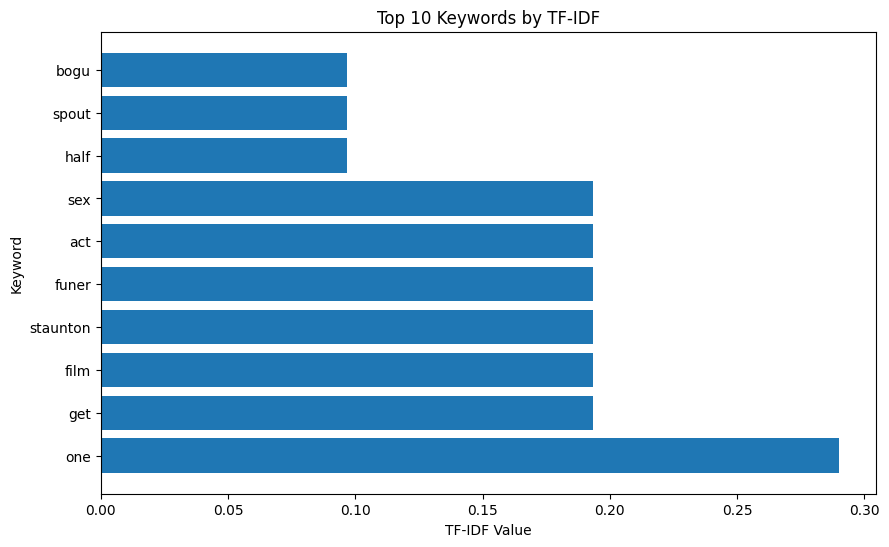

In [78]:
#Obtendo as palavras-chave e seus valores de TF-IDF
feature_names = vectorizer.get_feature_names_out()
tfidf_values = X_train_tf.toarray()[0]  # Exemplo para o primeiro documento

#Ordenando as palavras-chave pelo valor de TF-IDF em ordem decrescente
sorted_indices = tfidf_values.argsort()[::-1]
sorted_feature_names = [feature_names[idx] for idx in sorted_indices]
sorted_tfidf_values = tfidf_values[sorted_indices]

#Definindo o número de palavras-chave a serem exibidas no gráfico
num_keywords = 10

#Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names[:num_keywords], sorted_tfidf_values[:num_keywords])
plt.xlabel('TF-IDF Value')
plt.ylabel('Keyword')
plt.title('Top {} Keywords by TF-IDF'.format(num_keywords))
plt.show()


In [79]:
tokenizer = Tokenizer(num_words_train)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen= 128, truncating= 'post', padding= 'post')


In [80]:
X_train[0], len(X_train[0])

(array([    2,  5097,   277,  1875,   414,   319,   427,   616,  1453,
         3134,    95,   161,   319,  3134,   152,   139,    57,   703,
          564,     2,   257,    43, 11523,    10,     8,  5029,  4353,
         1611,   607,    50,    30,    31,  1442,  4402,   212,     3,
         6736,  3340,   102,   218,    80,  1736,   960,    41,     3,
          452,  1105,   141,  3747,  1423, 10987,    10,    84,    30,
           51,   315,    59,  1757,  2268, 19941, 16452,    34,   468,
          922,  2484,  1160,  1348, 16452,    39,  1940,     7,  2054,
          193,    14,    36,    38,   299,    63, 10547,  1283,   433,
         4959,   425,   165,     3,   243,  4315,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [81]:
X_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(X_val, maxlen= 128, truncating= 'post', padding= 'post')

In [82]:
X_val[0], len(X_val[0])

(array([ 5619,  8446,     6,     2,   401,  1254,    59,    21,   466,
          113,   580,  1630,  1292,   353,     2,     8,   162,  1212,
         1137,   302,  7271, 14008,    36,   322,  2339,  4623,  5619,
          170,   840,  1059,   879,   675,  2641,   550,  2421,  2782,
          335,   637,  4068,   169,   613,   807,  2122,   182,   466,
          336,   362,   744,   961,     2,    15,  1508,   113,   422,
         5619, 11342, 11342, 11168,   345,    45,   583, 20646,  9987,
          345,   170,   687, 19316,     2,   353,   136,  5619,  3128,
          690,  1317,    22,   131,   297,  1386,  1417,   986,   123,
         3953,   114,   193,    76,     2,   373,    26,     3,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [83]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(20000, 128) (20000,)
(5000, 128) (5000,)


In [84]:
#importando biblioteca necessária
from sklearn.preprocessing import MinMaxScaler

#Criando um objeto do MinMaxScaler
scaler = MinMaxScaler()

#Aplicando a normalização nos dados de treinamento
X_train_normalized = scaler.fit_transform(X_train)

#Aplicando anormalização nos dados de teste
X_test_normalized = scaler.transform(X_val)


In [85]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

In [91]:
#Definindo o modelo
model = Sequential()

model.add(Embedding(input_dim= num_words_train, output_dim= 200,
                    input_length= 128, trainable= True))
model.add(LSTM(200, dropout= 0.1, return_sequences= True))
model.add(Dropout(0.2))
model.add(LSTM(200, dropout= 0.1))
model.add(Dropout(0.1))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))

model.compile(optimizer= Adam(learning_rate=0.0001, decay=0.0001),
              loss= 'binary_crossentropy',
              metrics= ['accuracy'])

In [92]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 128, 200)          5000000   
                                                                 
 lstm_8 (LSTM)               (None, 128, 200)          320800    
                                                                 
 dropout_7 (Dropout)         (None, 128, 200)          0         
                                                                 
 lstm_9 (LSTM)               (None, 200)               320800    
                                                                 
 dropout_8 (Dropout)         (None, 200)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               25728     
                                                                 
 dense_12 (Dense)            (None, 64)               

In [93]:
history = model.fit(X_train, y_train, epochs= 32,
                    batch_size= 64,
                    shuffle= False,
                    validation_data= (X_val, y_val))

Epoch 1/32
313/313 [==============================] - 144s 442ms/step - loss: 0.6489 - accuracy: 0.5705 - val_loss: 0.4102 - val_accuracy: 0.8292
Epoch 2/32
313/313 [==============================] - 135s 432ms/step - loss: 0.3233 - accuracy: 0.8670 - val_loss: 0.3237 - val_accuracy: 0.8674
Epoch 3/32
313/313 [==============================] - 138s 440ms/step - loss: 0.2127 - accuracy: 0.9226 - val_loss: 0.3758 - val_accuracy: 0.8710
Epoch 4/32
313/313 [==============================] - 136s 434ms/step - loss: 0.1590 - accuracy: 0.9471 - val_loss: 0.4624 - val_accuracy: 0.8538
Epoch 5/32
313/313 [==============================] - 136s 434ms/step - loss: 0.1276 - accuracy: 0.9602 - val_loss: 0.6143 - val_accuracy: 0.8500
Epoch 6/32
313/313 [==============================] - 140s 447ms/step - loss: 0.1077 - accuracy: 0.9681 - val_loss: 0.5606 - val_accuracy: 0.8478
Epoch 7/32
313/313 [==============================] - 139s 444ms/step - loss: 0.0969 - accuracy: 0.9726 - val_loss: 0.5326 -

In [94]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


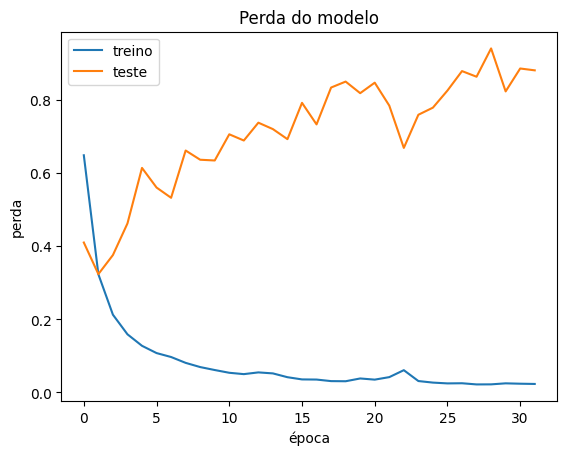

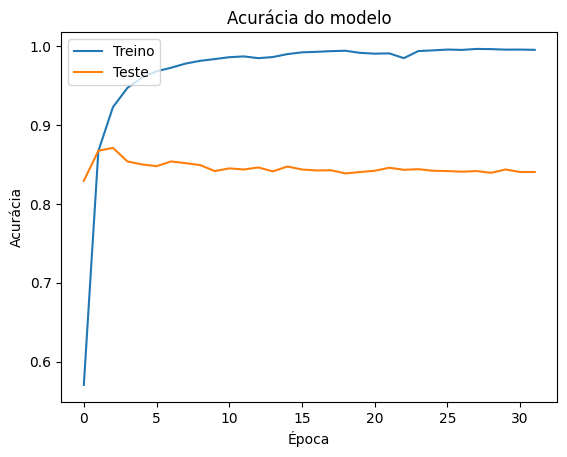

In [95]:
plt.plot(history.history['loss']) # perda/erro durante o treinamento
plt.plot(history.history['val_loss']) #perda/erro durante a validação (teste)
plt.title('Perda do modelo')
plt.ylabel('perda')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy']) # acurácia durante o treinamento
plt.plot(history.history['val_accuracy']) # acurácia durante a validação (teste)
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()
